# fun with random walks
the code implemented for running the random walk simulation can be found in [this file](https://github.com/michaelneuder/numerical_experiments/blob/master/random_walk/random_walk_3d.py). This notebook is to explore the relationship of final distance from home as a function of number of steps taken in the random walk. Step is determined by x,y,z distances each drawn from a random normal distribution with $ \mu = 0, \sigma = 1$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random_walk_3d import *
import pandas as pd
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 15, 10
plt.rcParams["font.size"] = "20"

def moving_average(data, window) :
    res = np.cumsum(data, dtype=float)
    res[window:] = res[window:] - res[:-window]
    return res[window - 1:] / window

in the random walk file I wrote and imported, there are two simulations: a graphical and non-graphical. first take a look at the graphical implementation. it plots the path of each walker on a 3d axes.

walker id: 0 -- steps taken: 10000 -- current location: <45.488, -75.110, -11.133> distance from home = 88.5136
walker id: 1 -- steps taken: 10000 -- current location: <-41.938, 151.556, 14.304> distance from home = 157.9006
walker id: 2 -- steps taken: 10000 -- current location: <33.454, -78.428, -15.086> distance from home = 86.5892
walker id: 3 -- steps taken: 10000 -- current location: <73.229, 53.591, -80.213> distance from home = 121.1145
walker id: 4 -- steps taken: 10000 -- current location: <-39.678, -62.655, 65.894> distance from home = 99.2071
walker id: 5 -- steps taken: 10000 -- current location: <-50.236, 89.103, -265.713> distance from home = 284.7216
walker id: 6 -- steps taken: 10000 -- current location: <-47.583, 140.457, -6.221> distance from home = 148.4282
walker id: 7 -- steps taken: 10000 -- current location: <-61.501, -31.413, 8.649> distance from home = 69.5988
walker id: 8 -- steps taken: 10000 -- current location: <-37.217, -6.585, -127.157> distance from hom

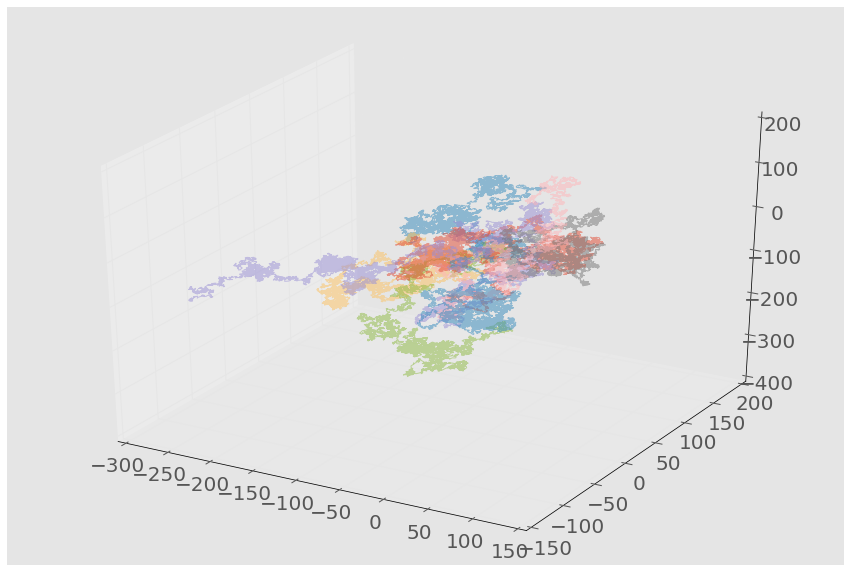

In [3]:
num_walkers = 10
num_steps = 10000
sim = simulation(num_walkers, num_steps)

i think this looks really cool and it is fun to play around with the graphics, but it is a bit more interesting to explore these results with a more quantitative lense. the non-graphical implementation does the exact same thing as the graphical, but can go faster due to not plotting each walkers entire path history. the main relationship to explore is distance from home (0,0,0) as a function of step count. this value is extremely difficult to come by analytically due to the fact that the walker has an infinite number of options for each step as far as direction and distance. so this is what i want to explore.

In [4]:
distances = np.arange(1,10000)
num_walkers = 20
mean_distances = []
for distance in distances:
    if distance % 1000 == 0:
        print('simulating random walk with {} steps'.format(distance))
    current_sim = simulation_non_graphical(num_walkers, distance)
    mean_distances.append(current_sim.get_distances().mean())

simulating random walk with 1000 steps
simulating random walk with 2000 steps
simulating random walk with 3000 steps
simulating random walk with 4000 steps
simulating random walk with 5000 steps
simulating random walk with 6000 steps
simulating random walk with 7000 steps
simulating random walk with 8000 steps
simulating random walk with 9000 steps


The code above takes awhile to run, but it simulates walkers taking steps ranging from 1 to 10,000. Each step size has twenty walkers taking that number of steps and their average distance from home is returned. below i plot this data along with a 100 year rolling average to smooth out the noise.

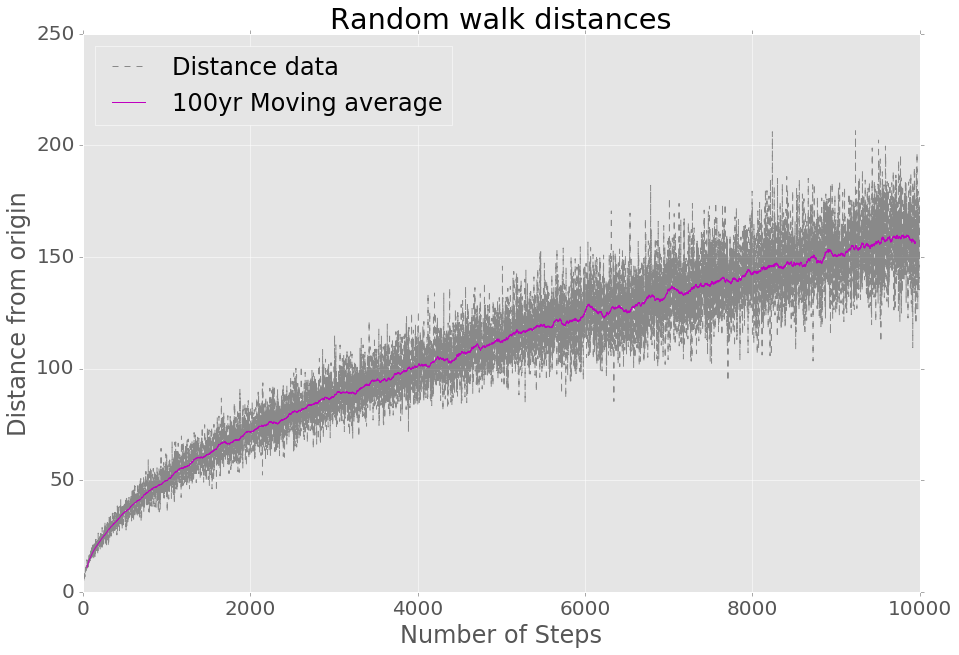

In [10]:
plt.plot(distances, mean_distances, 'k--', alpha=.4, label='Distance data')
x_avg, y_avg = moving_average(distances,100), moving_average(mean_distances,100)
plt.plot(x_avg, y_avg, 'm', label='100yr Moving average')
plt.xlabel('Number of Steps')
plt.ylabel('Distance from origin')
plt.title('Random walk distances')
plt.legend(loc=2)
plt.savefig('rand_walk_iters.png')
plt.show()

this tells us that clearly distance from home increases as number of steps increases. still working on getting a curve fitted to this data to see how we can model it with some logarithmic function.

[  2.53572156e+01   2.00055778e-02] [[  2.26259030e-03  -3.31840378e-06]
 [ -3.31840378e-06   1.18705356e-08]]


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log


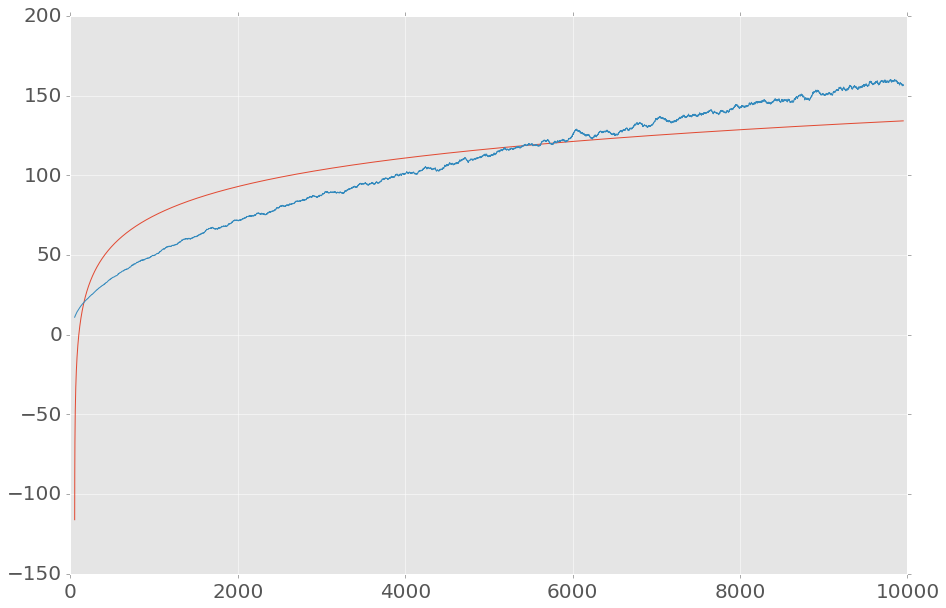

In [6]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a * np.log(b*x-1)

popt, pcov = curve_fit(func, x_avg, y_avg)
print(popt, pcov)
plt.plot(x_avg, popt[0]*np.log(popt[1]*x_avg-1))
plt.plot(x_avg, y_avg)
plt.show()